In [23]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline 

from sklearn.preprocessing import OneHotEncoder

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

In [26]:
train = pd.read_csv('train.csv')
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,A,B,A,A,B,D,A,E,C,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,2,B,A,A,A,B,B,A,E,A,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,3,A,A,A,C,B,D,A,B,C,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,4,A,A,A,C,B,D,A,E,G,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,6,A,B,A,A,B,B,A,E,C,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [27]:
test = pd.read_csv('test.csv')
test.head()


,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,A,B,A,C,B,D,A,E,E,...,0.701679,0.595507,0.286912,0.279884,0.202234,0.242654,0.285147,0.264308,0.653654,0.302448
1,5,A,B,A,C,B,D,A,E,C,...,0.277480,0.479552,0.397436,0.476742,0.857073,0.516393,0.562065,0.730542,0.318492,0.736251
2,15,A,B,A,C,B,D,A,E,C,...,0.279508,0.676395,0.695284,0.253316,0.586934,0.548555,0.836193,0.759788,0.333572,0.273905
3,16,A,A,B,A,B,D,A,E,E,...,0.479503,0.759875,0.240049,0.298074,0.442475,0.596746,0.414131,0.255382,0.589080,0.311625
4,17,A,B,A,A,B,B,A,E,E,...,0.757845,0.210232,0.329851,0.616663,0.170475,0.263235,0.710961,0.224045,0.285860,0.794931


In [28]:
print(train.isnull().sum())
print(test.isnull().sum())

id        0
cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
target    0
dtype: int64
id        0
cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
dtype: int64


In [29]:
train.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250018.576947,0.524634,0.506649,0.444115,0.446214,0.455471,0.508337,0.478345,0.455904,0.459321,0.526899,0.504943,0.529938,0.524549,0.503349,7.456260
std,144450.150010,0.204875,0.235269,0.200089,0.238669,0.200695,0.231612,0.192432,0.204493,0.220642,0.204025,0.201549,0.230860,0.220892,0.225218,0.887295
min,1.000000,-0.093505,-0.055105,-0.060274,0.134760,0.189216,-0.087247,0.043953,0.208703,0.004041,0.073040,0.059644,0.064161,-0.005600,0.158121,0.000000
25%,124772.500000,0.370451,0.352307,0.314121,0.214572,0.279853,0.338747,0.339896,0.278041,0.308655,0.361957,0.338898,0.316662,0.332143,0.291289,6.798341
50%,250002.500000,0.492208,0.615156,0.457271,0.377823,0.411351,0.441384,0.410090,0.360736,0.425801,0.488867,0.519855,0.558827,0.407365,0.433909,7.496503
75%,375226.500000,0.654793,0.688150,0.554835,0.719758,0.621808,0.709515,0.604246,0.639388,0.541525,0.752765,0.672809,0.720381,0.732431,0.730870,8.161166
max,499999.000000,1.052666,0.851746,1.017689,1.006469,0.994050,1.044433,1.093312,1.036541,1.014156,0.972091,1.029773,1.038049,0.961370,0.873579,10.309208


In [30]:
train.drop(['id'],axis=1,inplace=True)
test.drop(['id'],axis=1,inplace=True)

C:\Users\49176\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


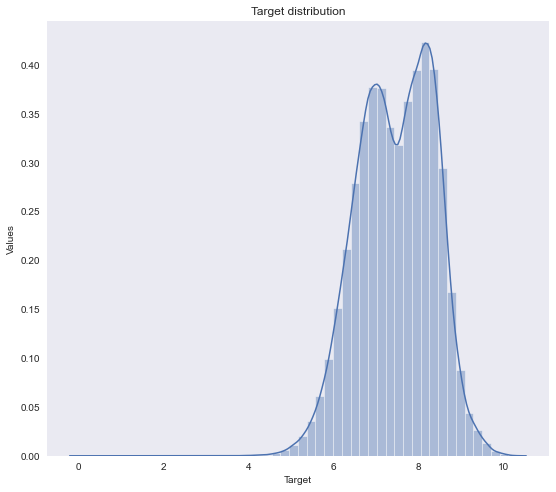

In [31]:
sns.set_style("dark")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(9, 8))

sns.distplot(train['target'], color="b")
ax.xaxis.grid(False)
ax.set(ylabel="Values")
ax.set(xlabel="Target")
ax.set(title="Target distribution")
sns.despine(trim=True, left=True)
plt.show()


In [32]:
features = [f'cont{x}'for x in range(1,14)]

C:\Users\49176\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\49176\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\49176\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<Figure size 432x288 with 0 Axes>

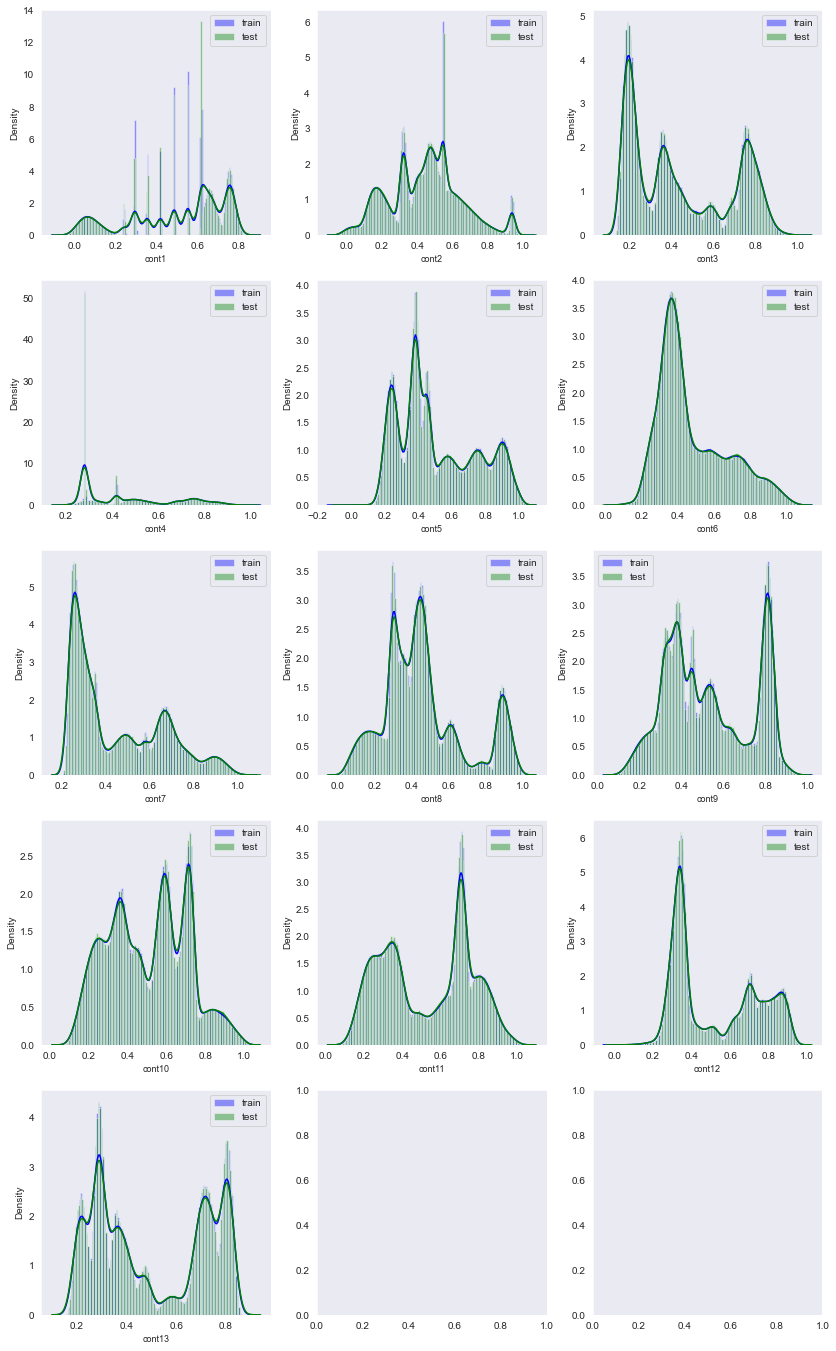

In [33]:
# we will look into the features distribution now, to get insight into the data
i = 1
plt.figure()
fig, ax = plt.subplots(5, 3,figsize=(14, 24))
for feature in features:
    plt.subplot(5, 3,i)
    sns.distplot(train[feature],color="blue", kde=True,bins=120, label='train')
    sns.distplot(test[feature],color="green", kde=True,bins=120, label='test')
    plt.xlabel(feature, fontsize=9); plt.legend()
    i += 1
plt.show()

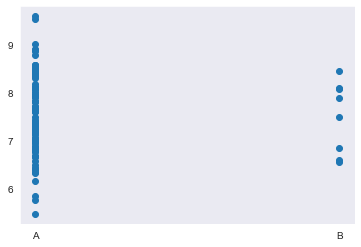

In [34]:
fig, ax = plt.subplots()
ax.scatter(train["cat0"][:100], train["target"][:100])


<AxesSubplot:xlabel='cat1', ylabel='target'>

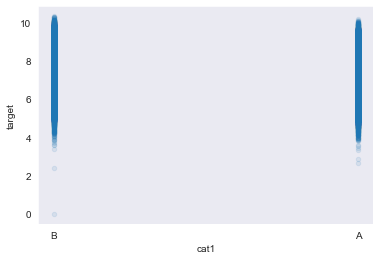

In [35]:
train.plot(kind="scatter", x="cat1", y="target", alpha=0.1)


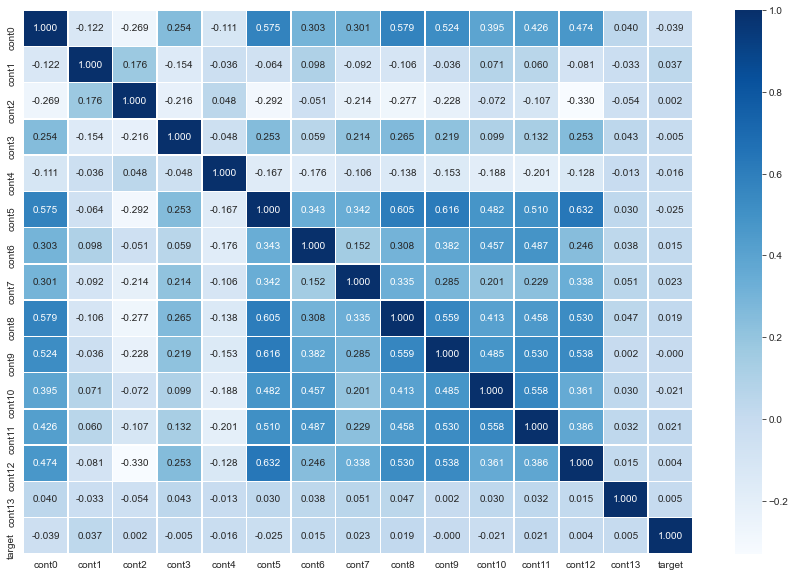

In [36]:

corr_matrix = train.corr()
corr_matrix
    
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".3f",
                 cmap="Blues")

# 

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    300000 non-null  object 
 1   cat1    300000 non-null  object 
 2   cat2    300000 non-null  object 
 3   cat3    300000 non-null  object 
 4   cat4    300000 non-null  object 
 5   cat5    300000 non-null  object 
 6   cat6    300000 non-null  object 
 7   cat7    300000 non-null  object 
 8   cat8    300000 non-null  object 
 9   cat9    300000 non-null  object 
 10  cont0   300000 non-null  float64
 11  cont1   300000 non-null  float64
 12  cont2   300000 non-null  float64
 13  cont3   300000 non-null  float64
 14  cont4   300000 non-null  float64
 15  cont5   300000 non-null  float64
 16  cont6   300000 non-null  float64
 17  cont7   300000 non-null  float64
 18  cont8   300000 non-null  float64
 19  cont9   300000 non-null  float64
 20  cont10  300000 non-null  float64
 21  cont11  30

In [38]:
from sklearn.preprocessing import LabelEncoder
df=train
for c in df.columns:
    if df[c].dtype=='object': 
        lbl = LabelEncoder()
        df[c]=df[c].fillna('N')
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)
        
X=df

In [39]:
df=test
for c in df.columns:
    if df[c].dtype=='object': 
        lbl = LabelEncoder()
        df[c] = df[c].fillna('N')
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)
        
test=df

In [40]:
y = X["target"].copy()
X = X.drop("target", axis=1)

In [41]:
test[:10]

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,1,0,2,1,3,0,4,4,6,...,0.701679,0.595507,0.286912,0.279884,0.202234,0.242654,0.285147,0.264308,0.653654,0.302448
1,0,1,0,2,1,3,0,4,2,11,...,0.277480,0.479552,0.397436,0.476742,0.857073,0.516393,0.562065,0.730542,0.318492,0.736251
2,0,1,0,2,1,3,0,4,2,5,...,0.279508,0.676395,0.695284,0.253316,0.586934,0.548555,0.836193,0.759788,0.333572,0.273905
3,0,0,1,0,1,3,0,4,4,5,...,0.479503,0.759875,0.240049,0.298074,0.442475,0.596746,0.414131,0.255382,0.589080,0.311625
4,0,1,0,0,1,1,0,4,4,8,...,0.757845,0.210232,0.329851,0.616663,0.170475,0.263235,0.710961,0.224045,0.285860,0.794931
5,0,0,0,2,1,1,0,4,2,0,...,0.452871,0.226598,0.691911,0.244650,0.345953,0.225896,0.698854,0.304095,0.335822,0.737444
6,0,1,0,2,1,3,0,4,2,10,...,0.278060,0.742574,0.362563,0.550190,0.404149,0.347697,0.838852,0.654562,0.614094,0.797990
7,0,1,1,0,1,1,0,4,4,12,...,0.424205,0.217008,0.235191,0.655189,0.325147,0.337095,0.303026,0.306567,0.350360,0.817490
8,0,1,0,2,1,1,0,4,3,14,...,0.726586,0.379403,0.390793,0.534797,0.301720,0.293707,0.341119,0.157693,0.331178,0.271294
9,0,0,0,0,1,1,0,4,2,10,...,0.753891,0.439589,0.399967,0.232440,0.490757,0.533921,0.622042,0.334388,0.248404,0.228589


# Modelling

In [42]:
# Split data into train and test sets
np.random.seed(40) # Makes the random numbers predictable

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,                                                   
                                                    test_size=0.2)

# Score

In [43]:
def rmse(model):
    yhat = model.predict(X_test)
    mse = mean_squared_error(y_test, yhat)
    score = {"Training root mean squared error ": np.sqrt(mse)}
    pred = {"Predictions  ": yhat}
    
    return score

In [44]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

LinearRegression 

In [45]:
model_lr = LinearRegression(n_jobs=-1)
model_lr.fit(X_train, y_train)    
rmse(model_lr)

{'Training root mean squared error ': 0.8711625511847043}

In [46]:
pickle.dump(model_lr, open('linear_regression_model', 'wb'))

 Cross-validation

In [47]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(model_lr, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10, verbose=True, n_jobs=-1)
regressor_forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(regressor_forest_rmse_scores)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Scores: [0.87295286 0.87196816 0.86709642 0.86452293 0.86751206 0.86956452
 0.86993196 0.873552   0.86457889 0.86281567]
Mean: 0.8684495464734793
Standard deviation: 0.0035635206568814075


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.3s finished


Random Forest

In [48]:
model_rf = RandomForestRegressor(n_jobs=-1, verbose=True, n_estimators=100)                          
model_rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished


RandomForestRegressor(n_jobs=-1, verbose=True)

In [49]:
rmse(model_rf)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.5s finished


{'Training root mean squared error ': 0.8617887768025418}

In [50]:
model_rf.predict(X_test)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.5s finished


array([7.24904769, 7.37976182, 7.59736652, ..., 7.47194889, 7.37844201,
       7.34161091])

In [51]:
pickle.dump(model_rf, open('finalized_model_rf.pkl', 'wb'))